### MERCEDES BENZ 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

In [2]:
df_train=pd.read_csv('mercedes_train.csv')
df_test=pd.read_csv('mercedes_test.csv')

In [3]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:

df_train.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [5]:
#number of samples
print(df_train.shape)

(4209, 378)


In [6]:
s=df_train.isnull().sum()
for i in s:
    if i!=0:
        print(s[i])

In [7]:
cat_feature = df_train.select_dtypes(include='object')
cat_feature

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


<AxesSubplot:xlabel='X0', ylabel='count'>

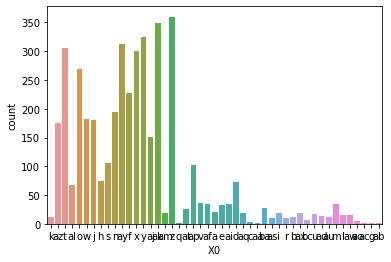

In [8]:
sns.countplot(x="X0", data=cat_feature)

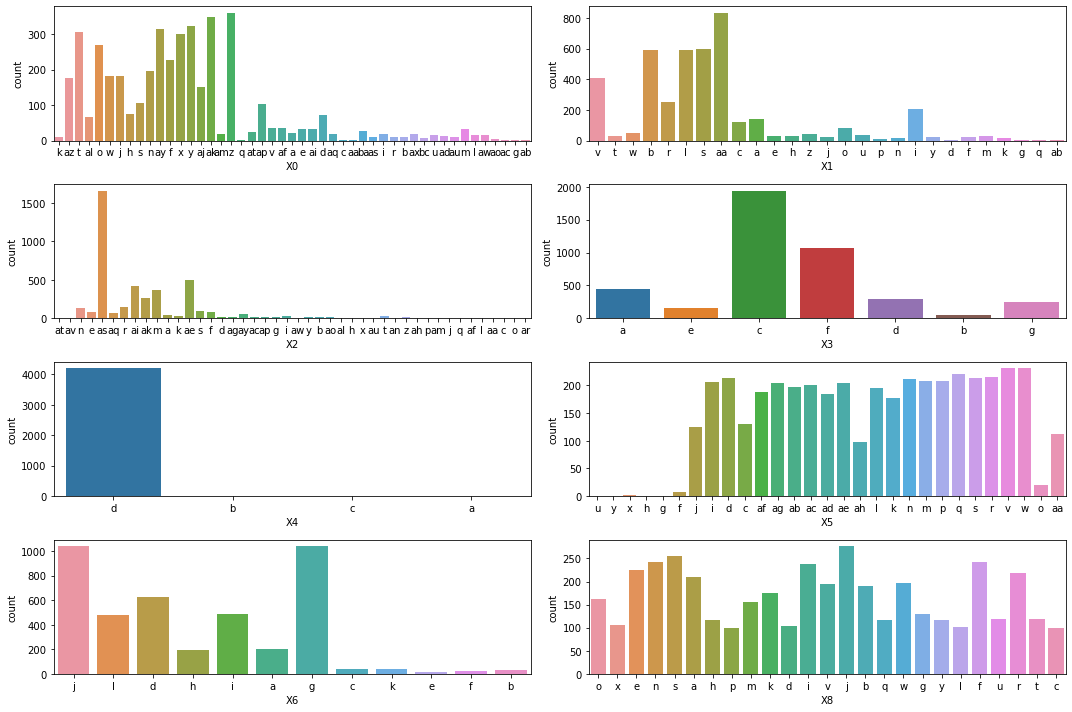

In [9]:
#Let's draw distribution of these variables
fig = plt.figure(figsize=(15, 10))

for index, col in enumerate(cat_feature):
    plt.subplot(4, 2, index+1)
    sns.countplot(x=col,data=cat_feature)
   

    
    
plt.tight_layout()    
plt.show();

C:\Users\Jit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

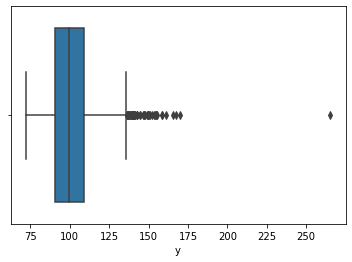

In [10]:
sns.boxplot(df_train["y"])

In [11]:

df_train = df_train.drop(df_train[df_train['y'] > 140].index)

C:\Users\Jit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

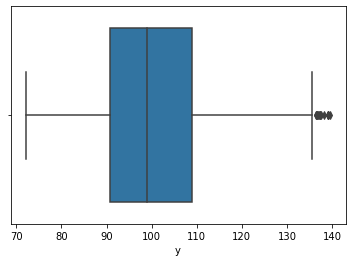

In [12]:
sns.boxplot(df_train["y"])

In [13]:
y_train=df_train["y"]

Text(0.5, 1.0, 'Distribution of the target value')

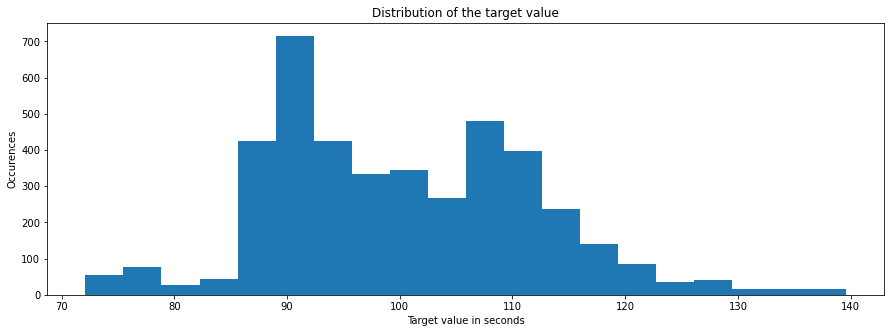

In [14]:
y_train = df_train['y'].values
plt.figure(figsize=(15, 5))
plt.hist(y_train, bins=20)
plt.xlabel('Target value in seconds')
plt.ylabel('Occurences')
plt.title('Distribution of the target value')

In [15]:
counts = [[], [], []]
for c in df_train.columns:
    typ = df_train[c].dtype
    uniq = len(np.unique(df_train[c]))
    if uniq == 1: counts[0].append(c)
    elif uniq == 2 and typ == np.int64: counts[1].append(c)
    else: counts[2].append(c)

print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))

print('Constant features:', counts[0])
print('Categorical features:', counts[2])

Constant features: 13 Binary features: 355 Categorical features: 10

Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347']
Categorical features: ['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [16]:
#Delete X4 row coz it has only 1 value, 
df_train.drop(columns=["X4"],axis=1,inplace=True)


In [17]:
from sklearn.preprocessing import LabelEncoder
for i in df_train.columns:
    if i in cat_feature.columns:
        enc = LabelEncoder()
        df_train[i]=enc.fit_transform(df_train[i])
    

In [18]:
df_train.head()


,ID,y,X0,X1,X2,X3,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,16,0,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,18,4,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,33,2,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,33,5,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,33,5,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Now delete variables that has constant values only
for i in df_train:
    if i in counts[0]:
        df_train.drop(columns=[i],inplace=True)

In [20]:
y_train=df_train["y"]
df_train.drop(columns=["y"],inplace=True)


C:\Users\Jit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ID', ylabel='y'>

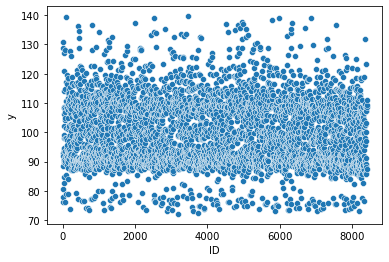

In [21]:
#What is the role of ID variable?
sns.scatterplot(df_train["ID"],y_train)

In [22]:
df_train.head()

,ID,X0,X1,X2,X3,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,32,23,16,0,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6,32,21,18,4,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,7,20,24,33,2,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,9,20,21,33,5,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,20,23,33,5,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#construct Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=145,criterion='mse',max_depth=None,max_features=100,min_samples_split=2,min_samples_leaf=1)

In [24]:
rf.fit(df_train,y_train)

RandomForestRegressor(max_features=100, n_estimators=145)

In [25]:
#Label Encode 1st 8 categrocal variables
from sklearn.preprocessing import LabelEncoder
for i in df_test.columns:
    if i in cat_feature.columns:
        enc = LabelEncoder()
        df_test[i]=enc.fit_transform(df_test[i])

In [26]:
df_test.drop(columns=["X4"],axis=1,inplace=True)

In [27]:
for i in df_test:
    if i in counts[0]:
        df_test.drop(columns=[i],inplace=True)

In [28]:
predictions=rf.predict(df_test)

In [29]:
from sklearn.metrics import r2_score

In [30]:
df_train.drop(columns=["ID"],inplace=True)

In [31]:
df_test

,ID,X0,X1,X2,X3,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,6,9,17,5,1,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,42,1,8,3,1,9,24,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,47,23,17,5,1,3,22,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,7,23,17,0,1,2,16,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
test_data=df_test.iloc[:,1:363]

In [33]:
output = pd.DataFrame({'ID': df_test.ID, 'y': predictions})
output.to_csv('mercedes_benz_baseline.csv', index=False)

In [34]:
output

,ID,y
0,1,78.507379
1,2,100.125379
2,3,78.364414
3,4,79.279448
4,5,118.367034
...,...,...
4204,8410,103.794345
4205,8411,98.844207
4206,8413,95.346690
4207,8414,108.777241


In [35]:
#train_test_split the training data
X_train, X_val, y_train, y_val = train_test_split(df_train, y_train, random_state=42)

In [36]:
rf=RandomForestRegressor(n_estimators=200,criterion='mse',max_depth=None,max_features=50,min_samples_split=2,min_samples_leaf=1)

In [37]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_features=50, n_estimators=200)

In [38]:
predictions=rf.predict(X_val)

In [39]:
r2_score(y_val,predictions)

0.5708094182180217

In [40]:
pred=rf.predict(test_data)


In [41]:
output = pd.DataFrame({'ID': df_test.ID, 'y': pred})
output.to_csv('mercedes_benz_baseline.csv', index=False)

In [43]:
search=range(10,1000,10)
scores=[]
for i in search:
    rf=RandomForestRegressor(n_estimators=i,criterion='mse',max_depth=None,max_features=100,min_samples_split=2,min_samples_leaf=1)
    rf.fit(X_train,y_train)
    pred=rf.predict(X_val)
    scores.append(r2_score(pred,y_val))
    

In [44]:
import matplotlib.pyplot as plt


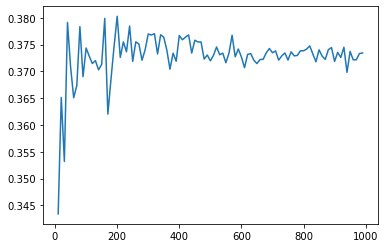

In [45]:
plt.plot(search,scores)

In [46]:
df_train.iloc[:,7:].corr()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
X10,1.000000,-0.033145,-0.028867,-0.100899,-0.002553,-0.005994,-0.010250,-0.010250,-0.038902,-0.047594,...,0.165870,-0.028612,-0.074470,-0.017014,-0.011325,-0.010568,-0.010250,-0.004038,-0.002553,-0.004424
X12,-0.033145,1.000000,0.214757,-0.245928,-0.006223,-0.014610,-0.024983,-0.024983,-0.094819,-0.116004,...,-0.110548,-0.069737,0.031260,-0.015962,-0.027604,-0.005488,-0.024983,-0.009843,-0.006223,-0.010784
X13,-0.028867,0.214757,1.000000,-0.085480,-0.005420,-0.012724,-0.021758,-0.009982,-0.082579,-0.042312,...,-0.169468,-0.060735,0.356757,-0.036116,-0.024040,0.023276,-0.021758,-0.008573,0.041515,-0.009392
X14,-0.100899,-0.245928,-0.085480,1.000000,-0.018944,-0.044476,0.012767,-0.076051,-0.288643,-0.353134,...,0.119178,0.026224,-0.098769,-0.038119,0.102178,0.007777,0.012767,0.026027,0.025305,0.043851
X15,-0.002553,-0.006223,-0.005420,-0.018944,1.000000,-0.001125,-0.001924,-0.001924,-0.007304,-0.008936,...,-0.014989,-0.005372,0.032338,-0.003194,-0.002126,-0.001984,-0.001924,-0.000758,-0.000479,-0.000831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,-0.010568,-0.005488,0.023276,0.007777,-0.001984,-0.004658,-0.007965,-0.007965,-0.021353,-0.006512,...,-0.062041,-0.022235,-0.061358,-0.013222,-0.008801,1.000000,-0.007965,-0.003138,-0.001984,-0.003438
X382,-0.010250,-0.024983,-0.021758,0.012767,-0.001924,-0.004518,1.000000,0.086749,-0.029322,-0.028022,...,-0.060174,-0.021566,-0.059512,-0.012824,-0.008536,-0.007965,1.000000,-0.003044,-0.001924,-0.003335
X383,-0.004038,-0.009843,-0.008573,0.026027,-0.000758,-0.001780,-0.003044,-0.003044,-0.011553,0.005663,...,-0.008850,-0.008497,0.021310,-0.005053,-0.003363,-0.003138,-0.003044,1.000000,-0.000758,-0.001314
X384,-0.002553,-0.006223,0.041515,0.025305,-0.000479,-0.001125,-0.001924,-0.001924,-0.007304,-0.008936,...,-0.014989,-0.005372,0.008757,-0.003194,-0.002126,-0.001984,-0.001924,-0.000758,1.000000,-0.000831
